In [1]:
#import necessary libraries - 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler
import pickle 

In [2]:
# reading the csv file - 
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Files\movie_data.csv")

# Exploratory Data Analysis , Data Cleaning & Preprocessing

In [3]:
# Displaying the shape of the data - 
df.shape

(1000, 6)

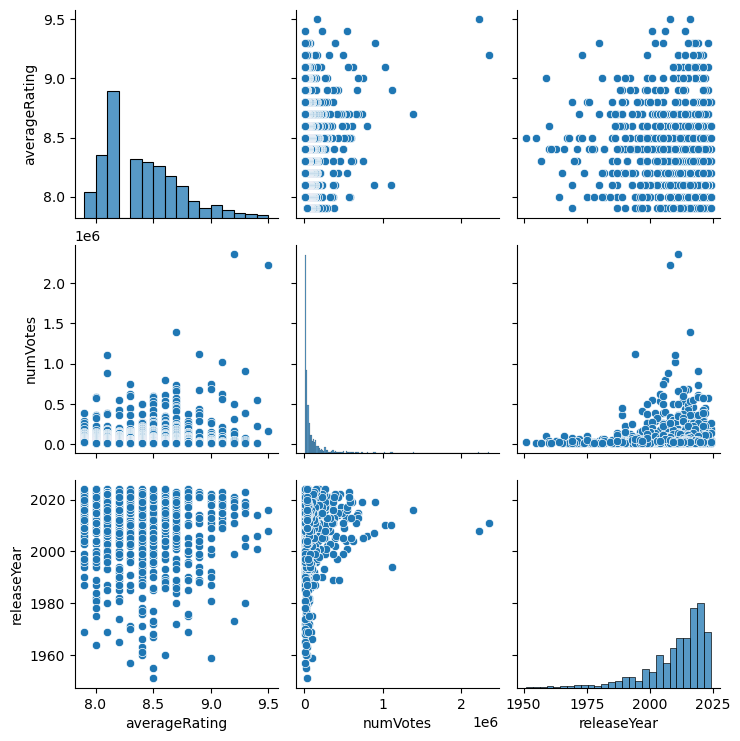

In [4]:
#plotting a pairplot - 
sns.pairplot(df)

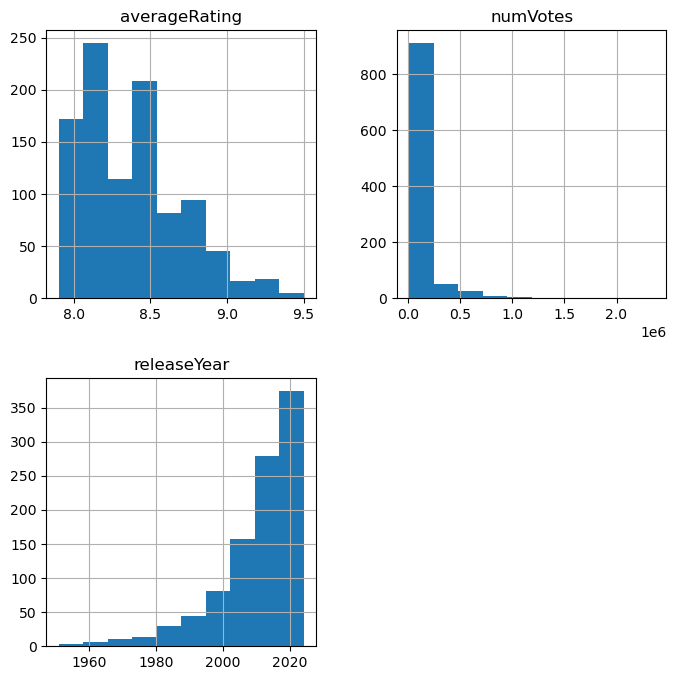

In [5]:
# Visualization of averageRating , numVotes and releaseYear to understand patterns- 
df.hist(figsize=(8,8));

Histogram 1: Average Rating

This histogram shows that most movies have an average rating between 8.0 and 8.5.
There is a peak around 8.25, indicating that this is the most common rating range.

Histogram 2: Number of Votes

This histogram shows that most movies have a relatively low number of votes, with the majority falling below 500,000.

Histogram 3: Release Year

This histogram shows a clear trend in the release year distribution.
There is a significant increase in movie releases from the 1990s onwards.

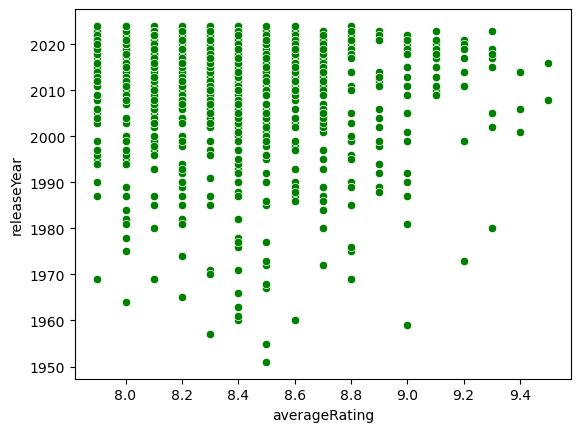

In [6]:
#Analyzing the relationship between releaseYear and averageRating to see trends over time- 
sns.scatterplot(x=df['averageRating'] , y=df['releaseYear'] , color='green');

This graph helps us understand how movie-making has changed over time. It also shows that while newer movies might be generally better, there are still great classic films to enjoy.

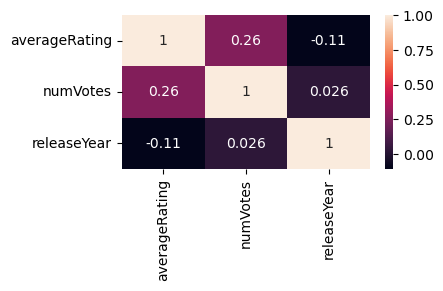

In [7]:
#Displaying the correlatiob b/w the numerical columns - 
plt.figure(figsize=(4,2))
numerical = df.select_dtypes(['int' , 'float'])
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix,annot=True);

In summary, the correlation matrix reveals that there are only weak relationships between the three variables. The strongest relationship is the weak positive correlation between average rating and the number of votes, indicating that movies with higher ratings tend to have more votes.

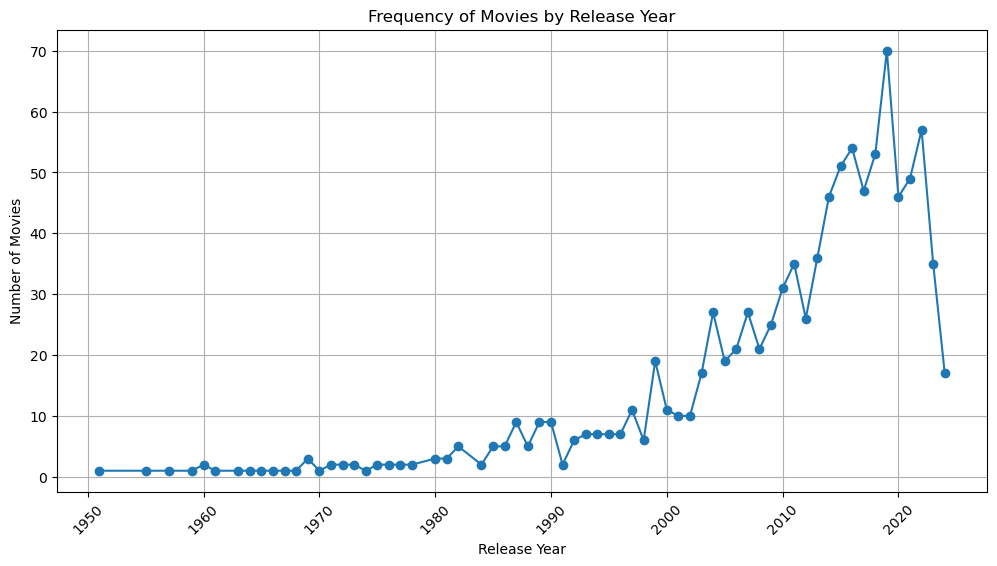

In [8]:
# Calculate the frequency of each release year
year_counts = df['releaseYear'].value_counts().sort_index()

# Extract x and y values for plotting
x = year_counts.index          
y = year_counts.values

# Plotting a line plot - 
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o')    
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Frequency of Movies by Release Year")
plt.xticks(rotation=45)    
plt.grid(True)

The graph illustrates a significant increase in movie production over the past few decades, with a peak in the late 20th and early 21st centuries. While the recent trend shows a slight decline, the overall picture indicates a thriving film industry.

In [9]:
#Deriving additional features from existing data, such as the number of genres per movie - 
df['num_genres'] = df['genres'].apply(lambda x: len(x.split(',')))
print(df)

             id               title                        genres  \
0     tt0903747        Breaking Bad        Crime, Drama, Thriller   
1     tt5491994     Planet Earth II                   Documentary   
2     tt0185906    Band of Brothers           Drama, History, War   
3     tt0795176        Planet Earth           Documentary, Family   
4     tt5152226        Tree of Life                         Drama   
..          ...                 ...                           ...   
995   tt5368542        The Exorcist        Drama, Horror, Mystery   
996  tt14824792                 Ted                        Comedy   
997   tt2262532         The Fosters                Drama, Romance   
998   tt1985443  Hatfields & McCoys       Drama, History, Romance   
999   tt1528406          Fairy Tail  Action, Adventure, Animation   

     averageRating  numVotes  releaseYear  num_genres  
0              9.5   2227227         2008           3  
1              9.5    161480         2016           1  
2  

In [10]:
# Displaying the shape after adding a new colujmn 'num_genres' - 
df.shape

(1000, 7)

In [11]:
#Displaying the first 5 -
df.head()

,id,title,genres,averageRating,numVotes,releaseYear,num_genres
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2227227,2008,3
1,tt5491994,Planet Earth II,Documentary,9.5,161480,2016,1
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543842,2001,3
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222999,2006,2
4,tt5152226,Tree of Life,Drama,9.4,12151,2014,1


In [12]:
# Displaying the basic info about the data - 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
 6   num_genres     1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [13]:
# Displaying the null values present in the data - 
df.isnull().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
num_genres       0
dtype: int64

In [14]:
#Displaying the duplicate values - 
df.duplicated().sum()

0

In [15]:
# Dropping unnecessary column ['id','title'] -
df.drop(['id','title'],axis=1,inplace=True)

In [16]:
# Displaying 5-point summary of the data - 
df.describe()

,averageRating,numVotes,releaseYear,num_genres
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,8.367300,9.209131e+04,2010.196000,2.491000
std,0.322063,1.735479e+05,12.325157,0.740586
min,7.900000,1.001700e+04,1951.000000,1.000000
25%,8.100000,1.788850e+04,2005.000000,2.000000
50%,8.300000,3.400900e+04,2014.000000,3.000000
75%,8.600000,9.086150e+04,2019.000000,3.000000
max,9.500000,2.360082e+06,2024.000000,3.000000


In [17]:
df.sample(3)

,genres,averageRating,numVotes,releaseYear,num_genres
711,"Crime, Drama, Thriller",8.1,122916,2013,3
189,"Adventure, Drama, History",8.6,184313,2024,3
257,"Action, Adventure, Animation",8.6,10208,1999,3


In [18]:
# Displaying the value_counts present of 'genres' column -
count_ = df['genres'].value_counts().head(15).sort_values(ascending=False)
count_

genres
Action, Adventure, Animation    97
Comedy                          80
Crime, Drama, Mystery           70
Comedy, Drama                   55
Drama                           51
Crime, Drama, Thriller          33
Action, Crime, Drama            32
Comedy, Drama, Romance          31
Action, Adventure, Drama        29
Crime, Drama                    25
Drama, Romance                  21
Comedy, Crime, Drama            19
Animation, Comedy, Drama        14
Documentary                     13
Comedy, Drama, Fantasy          12
Name: count, dtype: int64

In [19]:
# Displaying the unique value present in the 'genres' column - 
unique_ = df['genres'].value_counts()
unique_

genres
Action, Adventure, Animation    97
Comedy                          80
Crime, Drama, Mystery           70
Comedy, Drama                   55
Drama                           51
                                ..
Animation, Drama, Mystery        1
Comedy, Horror                   1
Adventure, Sport, Talk-Show      1
Animation, Comedy, Talk-Show     1
Adventure, Drama, Horror         1
Name: count, Length: 185, dtype: int64

In [20]:
# Displaying the unique value present in the 'genres' column - 
unique_ = df['num_genres'].unique()
unique_

array([3, 1, 2], dtype=int64)

In [21]:
# Displaying the value_counts present in the 'genres' column - 
unique_ = df['num_genres'].value_counts()
unique_

num_genres
3    640
2    211
1    149
Name: count, dtype: int64

In [22]:
df.columns

Index(['genres', 'averageRating', 'numVotes', 'releaseYear', 'num_genres'], dtype='object')

# Outlier Detection and Handling 

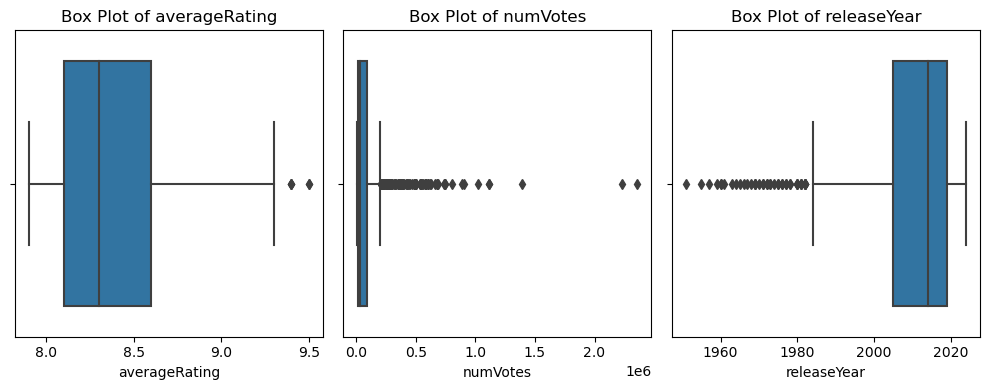

In [23]:
 #Plotting Distribution to see the outliers present in the data -

# Create a figure and axes (1 rows, 4 columns)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# List of column names you want to plot
columns = df[['averageRating', 'numVotes', 'releaseYear']]


# Loop through each column and plot a boxplot in the respective subplot
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()

In [24]:
# Handling the outliers using "capping"(IQR) because we have a small datset -

# Defining a function to cap outliers based on IQR
def cap_outliers(df, columns):
    df_capped = df.copy()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping for the specific column
        df_capped[column] = np.where(df[column] < lower_bound, lower_bound,
                                     np.where(df[column] > upper_bound, upper_bound, df[column]))
    
    return df_capped

# Apply the function to cap outliers
columns = ['averageRating', 'numVotes', 'releaseYear']
df_c = cap_outliers(df, columns)


In [25]:
# Assigning df_c to df 
df_c = df

In [26]:
#Dispalying the column name - 
df.columns

Index(['genres', 'averageRating', 'numVotes', 'releaseYear', 'num_genres'], dtype='object')

In [27]:
# # Initialize LabelEncoder (perrforming Label encoding)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# # Perform label encoding on the 'genre' column
# df['genre_'] = label_encoder.fit_transform(df['genres'])

In [28]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Sample data
# df['genres'] example: "Action, Comedy, Drama"
df['genres'] = df['genres'].str.split(', ')  # Step 1: Split by comma and space

# Initialize MultiLabelBinarizer and fit_transform the 'genres' column
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres'])

#Create a DataFrame with the encoded columns
genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

#Concatenate the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, genres_encoded_df], axis=1)

# Drop the original 'genres' column if it’s no longer needed
df.drop('genres', axis=1, inplace=True)


In [29]:
# Defining numercal features 
numerical_features = ['numVotes', 'releaseYear','num_genres']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [30]:
# Displaying the data- 
df.sample(5)

,averageRating,numVotes,releaseYear,num_genres,Action,Adventure,Animation,Biography,Comedy,Crime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
590,8.2,0.059140,0.767123,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
789,8.1,0.002902,0.876712,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
771,8.1,0.005482,0.835616,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
707,8.1,0.068304,0.863014,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
832,8.0,0.133867,0.849315,1.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(1000, 30)

# Model Selection And Training 

In [32]:
# Defining x and y variable 
X = df.drop(['averageRating'], axis=1)
y = df['averageRating']

In [33]:
X.columns

Index(['numVotes', 'releaseYear', 'num_genres', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')

In [34]:
X.head()

,numVotes,releaseYear,num_genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.943468,0.780822,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.064451,0.890411,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.227153,0.684932,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.090628,0.753425,0.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000908,0.863014,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Splitting the data into train and test data - 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# # installing xgboost 
# !pip install xgboost

In [37]:
#importing necessary libraries for model building 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [38]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor' : RandomForestRegressor(n_estimators=100, random_state=42),
    'SVM Regressor' : SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'XGB Regressor' : xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)
}

# Evaluate models
best_model = None
best_score = float('inf')
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Evaluation metrics for {model_name}")
    print(f"{model_name} - MAE:{mae}, RMSE:{rmse}, r2_score:{r2} , MSE:{mse}")
    print(" ")

    # Select best model based on RMSE
    if rmse < best_score:
        best_score = rmse
        best_model = model


print(f"Selected Model: {best_model}")

Evaluation metrics for Linear Regression
Linear Regression - MAE:0.2309167986033782, RMSE:0.2818223964740853, r2_score:0.1346254140548815 , MSE:0.07942386315439652
 
Evaluation metrics for Random Forest
Random Forest - MAE:0.23993999999999974, RMSE:0.29365840699697293, r2_score:0.06041082046965951 , MSE:0.0862352599999998
 
Evaluation metrics for Gradient Boosting
Gradient Boosting - MAE:0.22770047356926482, RMSE:0.27567064112264095, r2_score:0.17199270670308153 , MSE:0.07599430237696789
 
Evaluation metrics for Decision Tree Regressor
Decision Tree Regressor - MAE:0.2920000000000001, RMSE:0.3780211634287161, r2_score:-0.5569883334831489 , MSE:0.1429000000000001
 
Evaluation metrics for Random Forest Regressor
Random Forest Regressor - MAE:0.23946000000000006, RMSE:0.29105698754711234, r2_score:0.07698408417979041 , MSE:0.08471416999999992
 
Evaluation metrics for SVM Regressor
SVM Regressor - MAE:0.22093865956574946, RMSE:0.2839528212706093, r2_score:0.12149243479592653 , MSE:0.080629

In [39]:
# evaluating metrics for training dataset-
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    r2 = r2_score(y_train, y_train_pred)
    print(f"Evaluation metrics for {model_name}")
    print(f"{model_name} - MAE:{mae}, RMSE:{rmse}, r2_score:{r2} , MSE:{mse}")
    print(" ")


Evaluation metrics for Linear Regression
Linear Regression - MAE:0.23288014221307413, RMSE:0.2921407005406745, r2_score:0.19885112926298942 , MSE:0.08534618891239605
 
Evaluation metrics for Random Forest
Random Forest - MAE:0.09046500000000109, RMSE:0.11431656704082734, r2_score:0.8773274367019545 , MSE:0.01306827749999997
 
Evaluation metrics for Gradient Boosting
Gradient Boosting - MAE:0.19480016605770667, RMSE:0.24433811398327182, r2_score:0.4395827086339512 , MSE:0.05970111394490234
 
Evaluation metrics for Decision Tree Regressor
Decision Tree Regressor - MAE:9.992007221626408e-18, RMSE:9.42055475210265e-17, r2_score:1.0 , MSE:8.874685183736382e-33
 
Evaluation metrics for Random Forest Regressor
Random Forest Regressor - MAE:0.09034625000000085, RMSE:0.11354664790296538, r2_score:0.8789742654047344 , MSE:0.012892841249999992
 
Evaluation metrics for SVM Regressor
SVM Regressor - MAE:0.2029956906944981, RMSE:0.2661909547486567, r2_score:0.3348559966581971 , MSE:0.070857624390001

# Deployment as a Web Application 

In [40]:
# Initializing my best model again- 
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [41]:
# saving a pickle file 
# with open('best_model.pkl', 'wb') as file:  # no need to run it again the file is already in the system 
#     pickle.dump(best_model, file)

In [42]:
# TO Deploy this model on local host use command - 

# For Ananconda Prompt - streamlit run streamlit.py 
# For VS cose - streamlit run .\streamlit.py 